In [1]:
from model import CNN
from data_generator import DataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

/home/nakatsuka/anaconda3/envs/tf15/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
model = CNN(input_shape=(28, 28, 1),
            nb_classes=10)
data_generator = DataGenerator(batch_size=64,
                               is_training=True,
                               flatten=False)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [3]:
model.fit(data_generator, nb_epoch=10, model_dir='./model')


epoch 1 / 10
937/938  loss : 0.5807  acc : 0.8750
epoch 2 / 10
937/938  loss : 0.5715  acc : 0.7812
epoch 3 / 10
937/938  loss : 0.2982  acc : 0.9375
epoch 4 / 10
937/938  loss : 0.5883  acc : 0.7812
epoch 5 / 10
937/938  loss : 0.2913  acc : 0.9062
epoch 6 / 10
937/938  loss : 0.1182  acc : 0.9688
epoch 7 / 10
937/938  loss : 0.9025  acc : 0.7812
epoch 8 / 10
937/938  loss : 0.3536  acc : 0.9062
epoch 9 / 10
937/938  loss : 0.4836  acc : 0.8438
epoch 10 / 10
937/938  loss : 0.2814  acc : 0.9375
Training is done ... 


In [4]:
test_generator = DataGenerator(batch_size=64,
                               is_training=False,
                               flatten=False)

In [5]:
model.evaluate_generator(test_generator)

0.941

In [6]:
tf.gradients(model.logit, model.input_)

[<tf.Tensor 'gradients_1/conv2d/Conv2D_grad/Conv2DBackpropInput:0' shape=(?, 28, 28, 1) dtype=float32>]

In [7]:
x, y = next(test_generator())

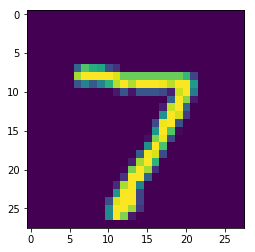

In [8]:
plt.imshow(x[0].reshape(28, 28))

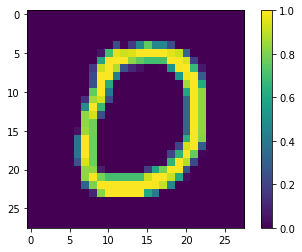

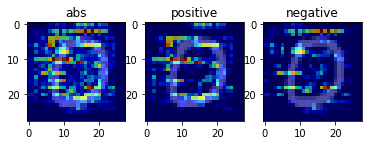

In [19]:
# sampling one digit
sampling_index = 10
_x = x[sampling_index]
_y = y[sampling_index]
_x = np.expand_dims(_x, 0)
_y = np.argmax(_y)
plt.figure()
plt.imshow(_x[0].reshape(28, 28))
plt.colorbar()

# calc gradients for output unit
grad = tf.gradients(model.logit[:, _y], model.input_)[0]
grads = model.sess.run(grad, 
                       feed_dict={model.input_: x})
plt.figure()
plt.subplot(131)
plt.title('abs')
plt.imshow(_x[0].reshape(28, 28), cmap='gray')
plt.imshow(np.abs(grads[0].reshape(28, 28)),
           cmap='jet', alpha=0.7, vmin=0., vmax=1.)
plt.subplot(132)
plt.title('positive')
plt.imshow(_x[0].reshape(28, 28), cmap='gray')
plt.imshow(np.maximum(0, grads[0].reshape(28, 28)), 
           cmap='jet', alpha=0.7, vmin=0., vmax=1.)
plt.subplot(133)
plt.title('negative')
plt.imshow(_x[0].reshape(28, 28), cmap='gray')
plt.imshow(-np.minimum(0, grads[0].reshape(28, 28)),
           cmap='jet', alpha=0.7, vmin=0., vmax=1.)